In [1]:
import numpy as np
from numpy import linalg as LA
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
from numpy import concatenate, real, std, abs
from numpy.fft import ifft, fftfreq
from numpy.random import normal, chisquare

def NoiseGenerator(spectrum, samples, totaltime, fmin=0.):
    f = fftfreq(samples)*samples/totaltime

    s_scale = abs(concatenate([f[f<0], [f[-1]]]))
    if fmin:
        ix = sum(s_scale>fmin)
        print(ix)
        if ix < len(f):
            s_scale[ix:] = s_scale[ix]
    s_scale = np.sqrt(spectrum(s_scale)*samples/totaltime)    
    sr = s_scale * normal(size=len(s_scale))
    si = s_scale * normal(size=len(s_scale))
    if not (samples % 2): si[0] = si[0].real

    s = sr + 1J * si
    s = concatenate([s[1-(samples % 2):][::-1], s[:-1].conj()])

    y = ifft(s).real

    return y / std(y)

#This noise generator requires a spectral density.
#You can define any kind of spectral density with a lambda function like these:

oneoverf2noise=lambda f: 1/f**2
oneoverfnoise=lambda f: 1/f
quasistaticnoise= lambda f: exp(-10000*f**2)#Simulates a DiracDelta
constantnoise= lambda f: f/f

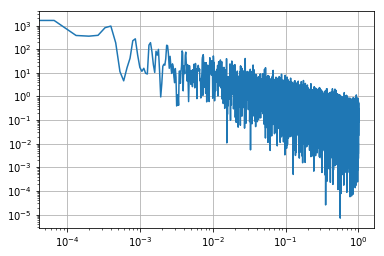

In [19]:
timeinterval =20
sampleSize=timeinterval*1500
test_noise = NoiseGenerator(oneoverfnoise,sampleSize,timeinterval)
	# optionally plot the Power Spectral Density with Matplotlib
from matplotlib import mlab
from matplotlib import pylab as plt
s, f = mlab.psd(test_noise, NFFT=sampleSize)
plt.loglog(f,s)
plt.grid(True)